<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Stock_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 개요

1. 코로나 펜데믹 이후 코스피와 삼성전자의 주가 흐름
2. 코스피와 삼성전자 유사도
3. Arima 모델을 이용한 코스피 예측

## 준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**야후 파이낸스에서 1. 코스피 2. 삼성전자 데이터를 가져온다.**
*  직접 다운로드
* API 이용

### Download

* 야후 파이낸스에서 다운로드 받은 후 코랩에 업로드 한다 (기간 설정도 가능하다)

In [4]:
df = pd.read_csv('./^KS11.csv')

### API

In [5]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 3.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=90ae64ec9cc648aa68de57a663bc9036f74539ab3ace5c160b904415d2dac46a
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
import yfinance as yf

In [7]:
df_s = yf.download('005930.KS',start='2020-06-08',end='2021-06-04')    #계속 업데이트되므로 end 를 안할 시 오류날 수 있음

[*********************100%***********************]  1 of 1 completed


## EDA

* 2020년 초 주가 대폭락 이후 이전 주가를 회복했을 때를 시점으로 합니다 (20.06.08~21.06.04)

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,2215.600098,2217.209961,2174.959961,2184.290039,2184.290039,854000
1,2020-06-09,2206.229980,2212.169922,2166.010010,2188.919922,2188.919922,817100
2,2020-06-10,2187.909912,2200.679932,2178.120117,2195.689941,2195.689941,706300
3,2020-06-11,2184.360107,2200.719971,2148.510010,2176.780029,2176.780029,827400
4,2020-06-12,2088.239990,2137.120117,2084.629883,2132.300049,2132.300049,689900


In [9]:
df_s.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-08,56400.0,56500.0,54700.0,54900.0,52637.437500,25634965
2020-06-09,55800.0,56500.0,54400.0,55500.0,53212.710938,23998831
2020-06-10,55100.0,55900.0,54900.0,55400.0,53116.835938,16742493
2020-06-11,54500.0,55100.0,53200.0,54300.0,52062.167969,33815123
2020-06-12,52100.0,52800.0,51500.0,52300.0,50144.589844,26976019


In [10]:
df_s['Date']=df_s.index
df_s.reset_index(drop=True,inplace=True)
df_s.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,56400.0,56500.0,54700.0,54900.0,52637.437500,25634965,2020-06-08
1,55800.0,56500.0,54400.0,55500.0,53212.710938,23998831,2020-06-09
2,55100.0,55900.0,54900.0,55400.0,53116.835938,16742493,2020-06-10
3,54500.0,55100.0,53200.0,54300.0,52062.167969,33815123,2020-06-11
4,52100.0,52800.0,51500.0,52300.0,50144.589844,26976019,2020-06-12


In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-08,2215.600098,2217.209961,2174.959961,2184.290039,2184.290039,854000
1,2020-06-09,2206.229980,2212.169922,2166.010010,2188.919922,2188.919922,817100
2,2020-06-10,2187.909912,2200.679932,2178.120117,2195.689941,2195.689941,706300
3,2020-06-11,2184.360107,2200.719971,2148.510010,2176.780029,2176.780029,827400
4,2020-06-12,2088.239990,2137.120117,2084.629883,2132.300049,2132.300049,689900


In [12]:
df = df[['Date','Close','Volume']]
df_s = df_s[['Date','Close','Volume']]

In [13]:
df.head()

,Date,Close,Volume
0,2020-06-08,2184.290039,854000
1,2020-06-09,2188.919922,817100
2,2020-06-10,2195.689941,706300
3,2020-06-11,2176.780029,827400
4,2020-06-12,2132.300049,689900


In [14]:
df_s.head()

,Date,Close,Volume
0,2020-06-08,54900.0,25634965
1,2020-06-09,55500.0,23998831
2,2020-06-10,55400.0,16742493
3,2020-06-11,54300.0,33815123
4,2020-06-12,52300.0,26976019


In [15]:
df.isnull().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [16]:
df_s.isnull().sum()

Date      0
Close     0
Volume    0
dtype: int64

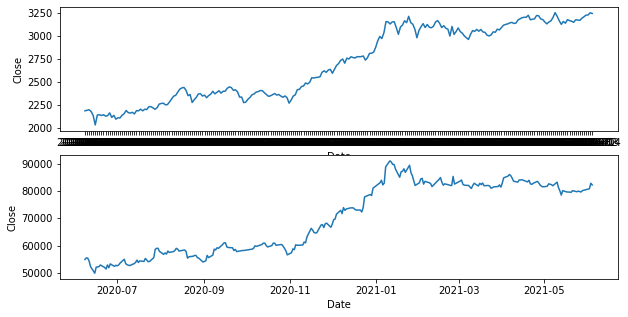

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10,5))
sns.lineplot(data=df,x=df['Date'],y=df['Close'],ax=ax[0])
sns.lineplot(data=df_s,x=df_s['Date'],y=df_s['Close'],ax=ax[1])

plt.show()

In [18]:
print(type(df['Date'][0]))
print(type(df_s['Date'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df['Date']=pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


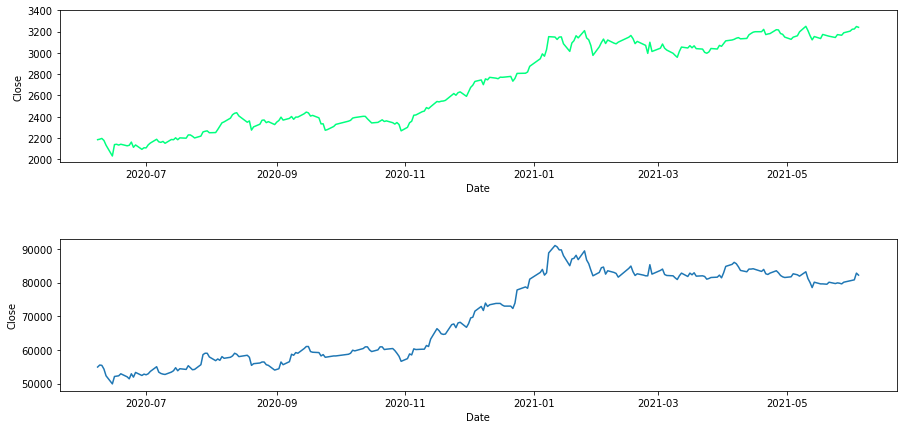

In [20]:
fig, ax = plt.subplots(2,1,figsize=(15,7))
sns.lineplot(data=df,x=df['Date'],y=df['Close'],ax=ax[0],c='springgreen')    #색 추가
sns.lineplot(data=df_s,x=df_s['Date'],y=df_s['Close'],ax=ax[1])    
ax[0].set_yticks(range(2000,3600,200))    #구간 설정
plt.subplots_adjust(hspace=0.5)    #간격 조절
plt.show()

## 유사도

* 코사인 유사도 

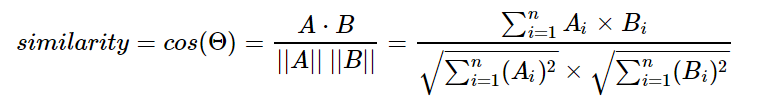

In [21]:
from numpy import dot
from numpy.linalg import norm

In [22]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [23]:
A = np.array([1,1,1])
A1 = np.array([100,100,100])
B = np.array([10,9,11])
B1= np.array([-1,-1,-1])
B2= np.array([-1,-1,2])
print(cos_sim(A,B))
print(cos_sim(A,B1))
print(cos_sim(A,B2))
print(cos_sim(A1,B))
print(cos_sim(A1,B1))
print(cos_sim(A1,B2))


0.9966832412776433
-1.0000000000000002
0.0
0.9966832412776432
-1.0
0.0


In [24]:
cos_sim(df['Close'],df_s['Close'])

0.9989132717952538

In [25]:
mean = df['Close'].mean()
std = df['Close'].std()
df_N = df['Close'].map(lambda x:(x-mean)/std)
df_N.head()

0   -1.301632
1   -1.289846
2   -1.272612
3   -1.320750
4   -1.433981
Name: Close, dtype: float64

In [26]:
mean1 = df_s['Close'].mean()
std1 = df_s['Close'].std()
df_s_N = df_s['Close'].map(lambda x:(x-mean1)/std1)
df_s_N.head()

0   -1.184602
1   -1.137146
2   -1.145055
3   -1.232058
4   -1.390244
Name: Close, dtype: float64

In [27]:
cos_sim(df_N,df_s_N)

0.9804039146857217

## Arima 모형

참고 : https://m.blog.naver.com/bluefish850/220749045909

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
df_train = df.loc[:len(df)-5,:]
df_train

,Date,Close,Volume
0,2020-06-08,2184.290039,854000
1,2020-06-09,2188.919922,817100
2,2020-06-10,2195.689941,706300
3,2020-06-11,2176.780029,827400
4,2020-06-12,2132.300049,689900
...,...,...,...
238,2021-05-25,3171.320068,612700
239,2021-05-26,3168.429932,1269000
240,2021-05-27,3165.510010,1081100
241,2021-05-28,3188.729980,966000


In [30]:
model = ARIMA(df_train['Close'].values, order=(1,2,1))

In [31]:
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  241
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1189.355
Method:                       css-mle   S.D. of innovations             33.266
Date:                Tue, 08 Jun 2021   AIC                           2386.710
Time:                        03:01:57   BIC                           2400.650
Sample:                             2   HQIC                          2392.326
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.029      0.050      0.960      -0.055       0.058
ar.L1.D2.y    -0.0569      0.064     -0.885      0.377      -0.183       0.069
ma.L1.D2.y    -1.0000      0.014    -70.376      0.0

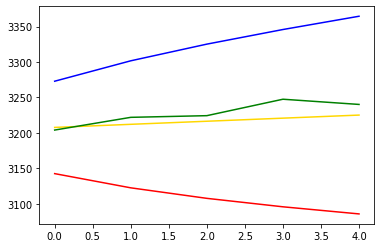

In [32]:
forecast_data = model_fit.forecast(steps=5)

pred_y = forecast_data[0].tolist()
test_y = df.loc[len(df)-5:,:]['Close'].values

pred_y_lower = []
pred_y_upper = []
for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_y_lower.append(lower)
  pred_y_upper.append(upper)

plt.plot(pred_y,c='gold')
plt.plot(pred_y_lower,c='red')
plt.plot(pred_y_upper,c='blue')
plt.plot(test_y,c='green')


## 마치며

* 감사합니다